In [1]:
conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
##Distribution Plots

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#distplot shows the distribution of a univariate set of observations (one variable)


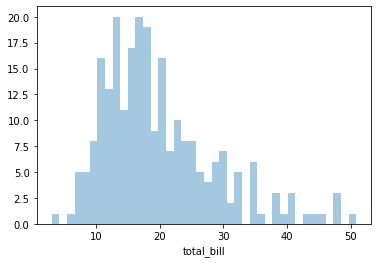

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=40)
#shows a historgram and a KDE kearnal density estimation

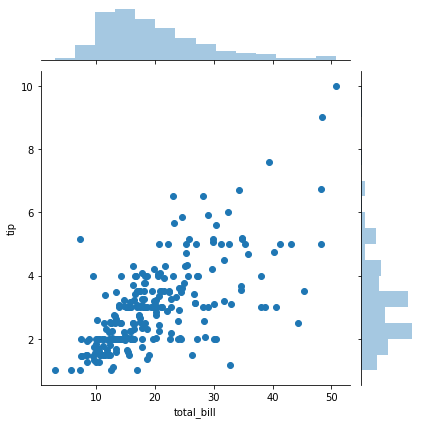

In [18]:
#jointplot allows to match up distplots for bivariate data
sns.jointplot(x='total_bill',y='tip',data=tips)

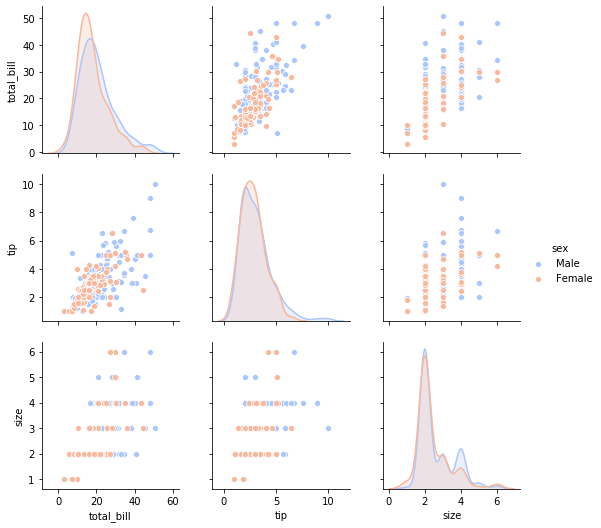

In [21]:
#plots joint plots for all combinations
sns.pairplot(tips,hue='sex',palette='coolwarm')

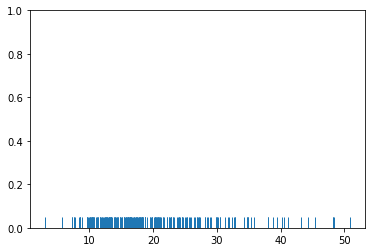

In [22]:
sns.rugplot(tips['total_bill'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


(0, 1)

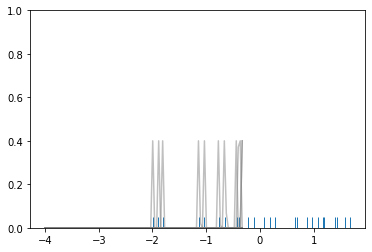

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#create dataset
dataset = np.random.randn(25)

#create a rugplot for dataset
sns.rugplot(dataset);

#set x-axis for plot
x_min = dataset.min()-2
x_max = dataset.max()-2

#100 equally spaced points between x axis
x_axis = np.linspace(x_min,x_max,100)

#set up the bandwith
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**2

#create an empty kernel list
kernel_list=[]

#plot each basis function
for data_point in dataset:
    
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel*.4
    plt.plot(x_axis,kernel,color='grey',alpha=.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'sum of the basis functions')

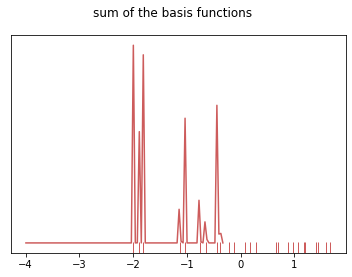

In [28]:
#to get kde plot we sum these basis functions

#plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

#plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

#add initial rugplot
sns.rugplot(dataset,c='indianred')

#get rid of y-tick marks
plt.yticks([])

#set title
plt.suptitle("sum of the basis functions")

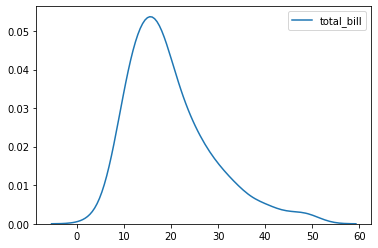

In [29]:
sns.kdeplot(tips['total_bill'])

In [30]:
##Categorical Plots

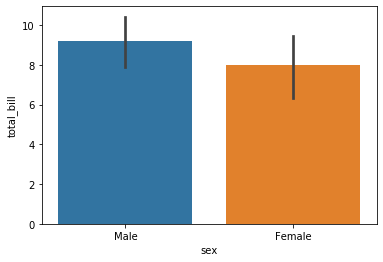

In [33]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

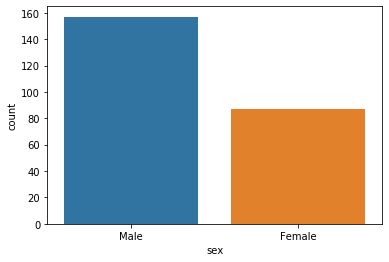

In [34]:
sns.countplot(x='sex',data=tips)

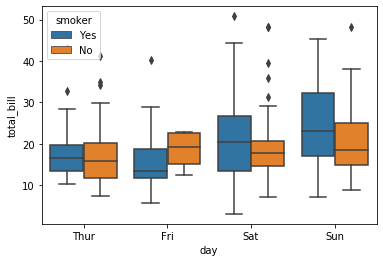

In [36]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

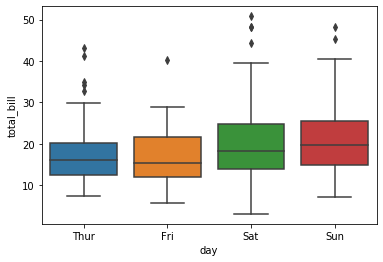

In [37]:
sns.boxplot(x='day',y='total_bill',data=tips)

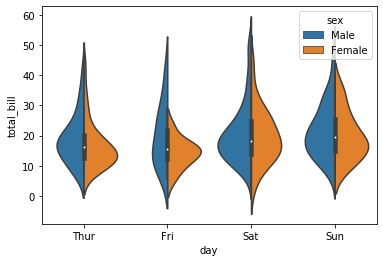

In [41]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


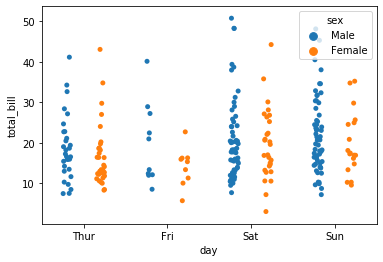

In [45]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

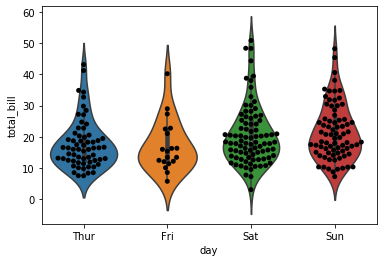

In [47]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


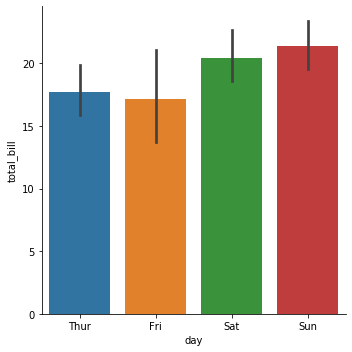

In [48]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [49]:
#Matrix Plots, heat maps

In [50]:
flights = sns.load_dataset('flights')

In [51]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [52]:
#matrix means the index is a variable

In [55]:
tc = tips.corr()

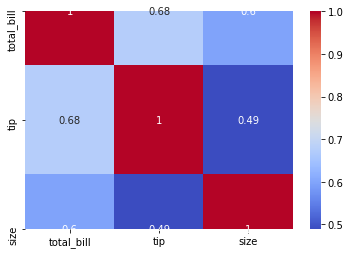

In [58]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [59]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [61]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

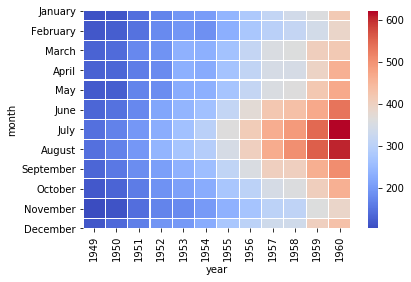

In [67]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidth=.2)

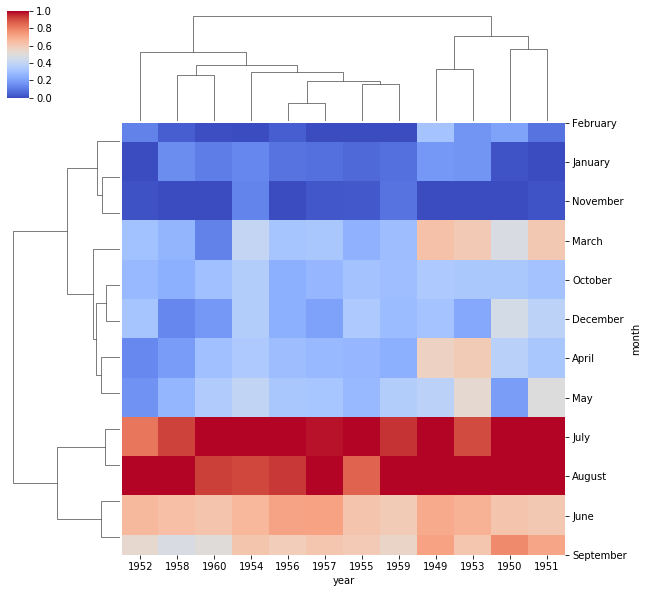

In [70]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [71]:
#grids

In [72]:
#automating subplots based off of features in our data

In [73]:
iris = sns.load_dataset('iris')

In [74]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

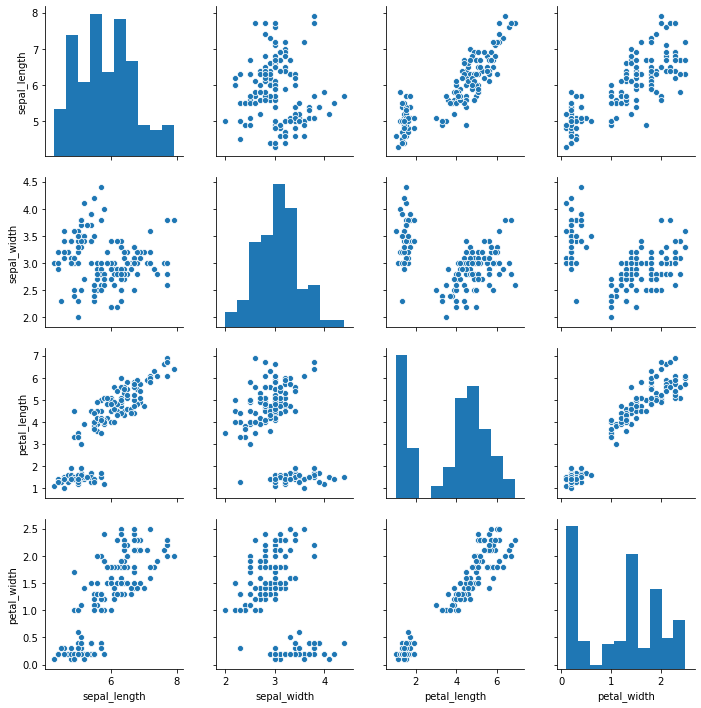

In [76]:
sns.pairplot(iris)

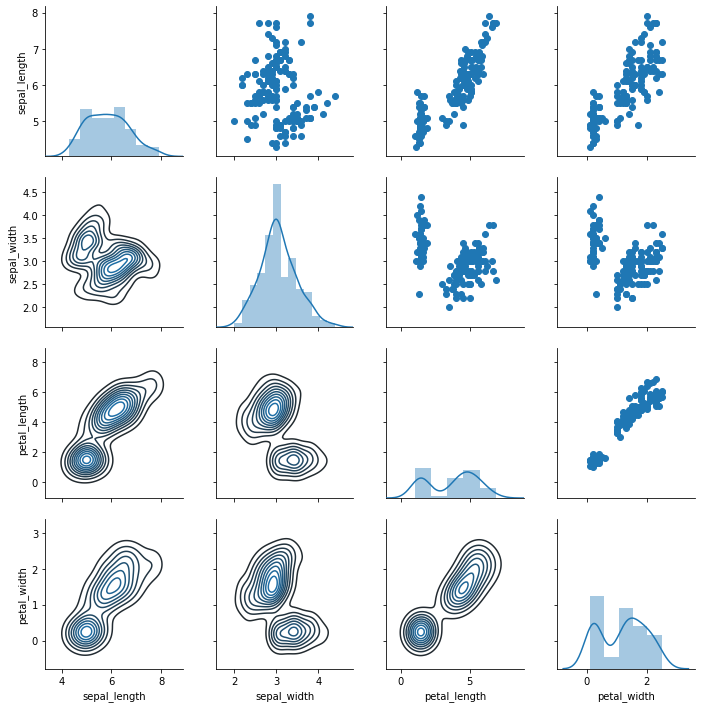

In [79]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

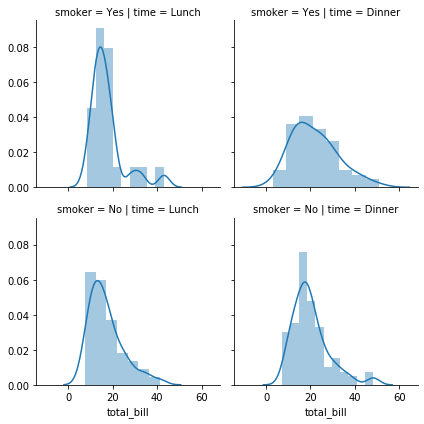

In [81]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

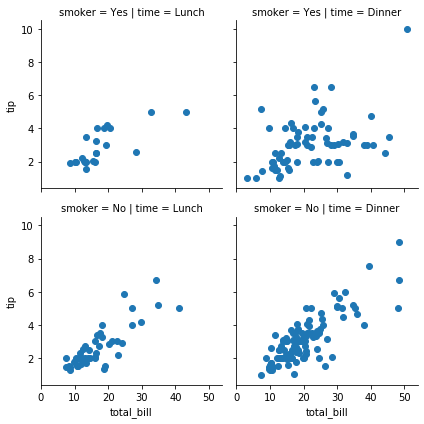

In [83]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

In [1]:
#Regression Plots

In [4]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


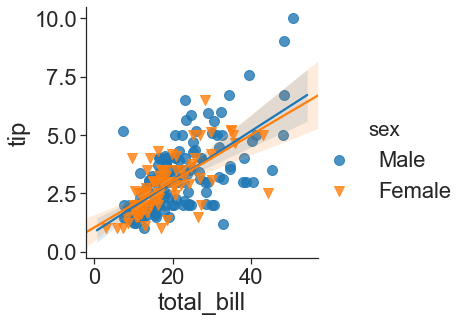

In [35]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


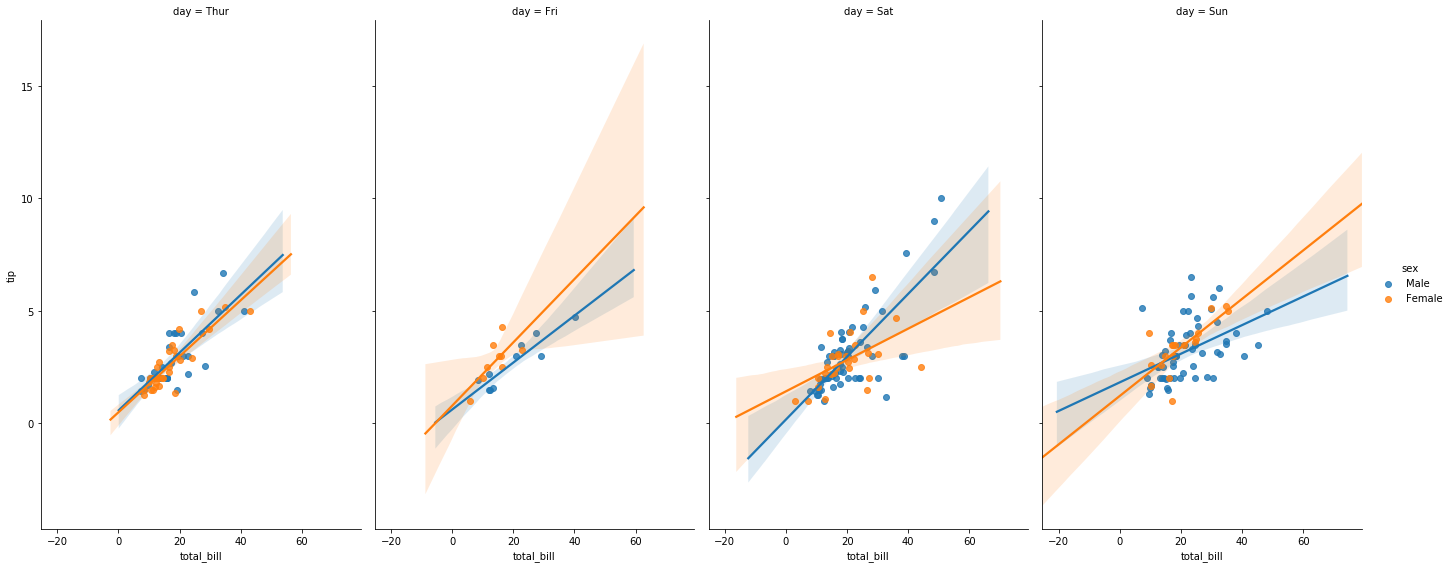

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,size=8)

In [14]:
##Style and Color

In [27]:
tips.head()
import matplotlib.pyplot as plt

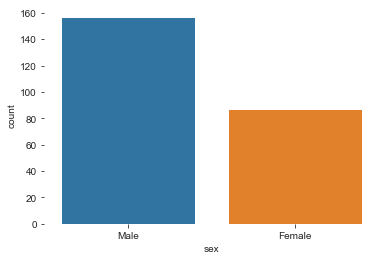

In [25]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

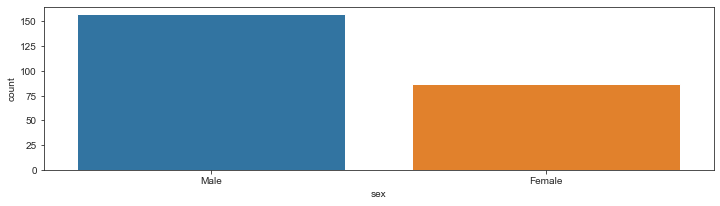

In [28]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

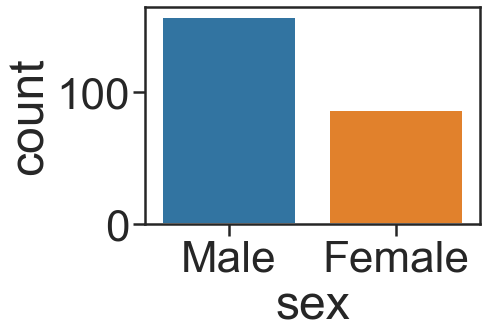

In [31]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)

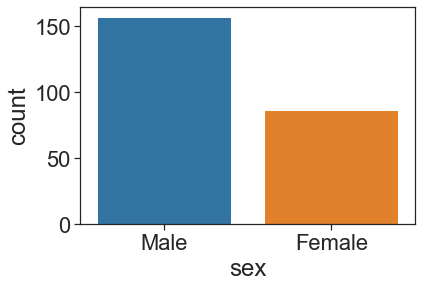

In [32]:
sns.set_context('notebook',font_scale=2)
sns.countplot(x='sex',data=tips)

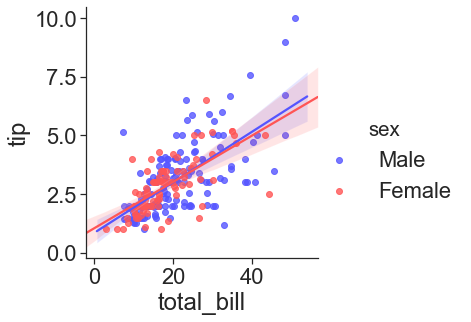

In [34]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')